In [103]:
import matplotlib.pyplot as plt
% matplotlib inline

In [161]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, batch_size=32, learning_rate=0.0001):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)
        
        self.loss = []
        self.theta = []
        self.avg_minibatch_partial_grads = []
        
        for _ in range(1, epochs):
            loss = self._avg_minibatch_loss(x, self.theta_array, y)
            print('loss: ', loss)
            print("theta: {}".format(self.theta_array))
            self.loss.append(loss)
            self.theta.append(self.theta_array)

            avg_minibatch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            print('avg minibatch_partial_grads: {}'.format(avg_minibatch_partial_grads))
            self.avg_minibatch_partial_grads.append(avg_minibatch_partial_grads)
            self.theta_array -= learning_rate * avg_minibatch_partial_grads

    def validate(self, x, y):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss
    
    def _check_theta_exists(self):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before predicting.")


In [162]:
linear_regression = LinearRegression()

In [163]:
x = np.array(np.arange(100))
delta = np.random.uniform(-10,10, size=(100,))
y = (.4 * x +3 + delta)

In [164]:
linear_regression.train(x, y, epochs=10, learning_rate=0.01)

loss:  25.67084910884208
theta: [0. 0.]
avg minibatch_partial_grads: [-1429.12615159   -22.42522596]
loss:  794.1919069337465
theta: [14.29126152  0.22425226]
avg minibatch_partial_grads: [45507.33152273   685.21647133]
loss:  25288.28638522511
theta: [-440.78205371   -6.62791245]
avg minibatch_partial_grads: [-1449065.08117942   -21847.76479713]
loss:  805241.2974996784
theta: [14049.86875808   211.84973552]
avg minibatch_partial_grads: [46141801.50292147   695657.92803465]
loss:  25640866.130953666
theta: [-447368.14627113   -6744.72954483]
avg minibatch_partial_grads: [-1.46926860e+09 -2.21514904e+07]
loss:  816468328.1962787
theta: [14245317.86892769   214770.17440709]
avg minibatch_partial_grads: [4.67851309e+10 7.05357982e+08]
loss:  25998362439.98405
theta: [-4.53605991e+08 -6.83880965e+06]
avg minibatch_partial_grads: [-1.48975379e+12 -2.24603354e+10]
loss:  827851891149.2716
theta: [1.44439320e+10 2.17764544e+08]
avg minibatch_partial_grads: [4.74374299e+13 7.15192396e+11]
los

In [185]:
linear_regression.train(x, y, epochs=15, learning_rate=0.001)

loss:  25.67084910884208
theta: [0. 0.]
avg minibatch_partial_grads: [-1429.12615159   -22.42522596]
loss:  57.293825262115604
theta: [1.42912615 0.02242523]
avg minibatch_partial_grads: [3264.51961584   48.33894377]
loss:  130.27627122387665
theta: [-1.83539346 -0.02591372]
avg minibatch_partial_grads: [-7456.92332049  -113.30311616]
loss:  297.3210583735353
theta: [5.62152986 0.0873894 ]
avg minibatch_partial_grads: [17033.49290659   255.92789132]
loss:  679.0397566234454
theta: [-11.41196305  -0.16853849]
avg minibatch_partial_grads: [-38908.64948282   -587.48593545]
loss:  1551.043797992304
theta: [27.49668643  0.41894744]
avg minibatch_partial_grads: [88876.98164783  1339.07969989]
loss:  3542.944043086588
theta: [-61.38029522  -0.92013226]
avg minibatch_partial_grads: [-203016.87203796   -3061.66997138]
loss:  8092.947152729819
theta: [141.63657682   2.14153771]
avg minibatch_partial_grads: [463740.57996226   6990.72686447]
loss:  18486.280283937875
theta: [-322.10400314   -4.849

In [171]:
linear_regression.train(x, y, epochs=20, learning_rate=0.0001)

loss:  25.67084910884208
theta: [0. 0.]
avg minibatch_partial_grads: [-1429.12615159   -22.42522596]
loss:  17.81868661084495
theta: [0.14291262 0.00224252]
avg minibatch_partial_grads: [-959.76157485  -15.34880899]
loss:  12.786333026335132
theta: [0.23888877 0.0037774 ]
avg minibatch_partial_grads: [-644.54788514  -10.59645431]
loss:  9.696765444164793
theta: [0.30334356 0.00483705]
avg minibatch_partial_grads: [-432.85813461   -7.40488264]
loss:  7.91823228125479
theta: [0.34662937 0.00557754]
avg minibatch_partial_grads: [-290.69251194   -5.26149438]
loss:  6.969116199829975
theta: [0.37569863 0.00610369]
avg minibatch_partial_grads: [-195.21758125   -3.8220403 ]
loss:  6.4958260225893305
theta: [0.39522038 0.00648589]
avg minibatch_partial_grads: [-131.09896934   -2.85533107]
loss:  6.270681064788038
theta: [0.40833028 0.00677142]
avg minibatch_partial_grads: [-88.03848887  -2.20610564]
loss:  6.166441564975318
theta: [0.41713413 0.00699203]
avg minibatch_partial_grads: [-59.12013

[array([-1429.12615159,   -22.42522596]), array([3264.51961584,   48.33894377]), array([-7456.92332049,  -113.30311616]), array([17033.49290659,   255.92789132]), array([-38908.64948282,   -587.48593545]), array([88876.98164783,  1339.07969989]), array([-203016.87203796,   -3061.66997138]), array([463740.57996226,   6990.72686447]), array([-1059297.65532361,   -15971.42257053])]


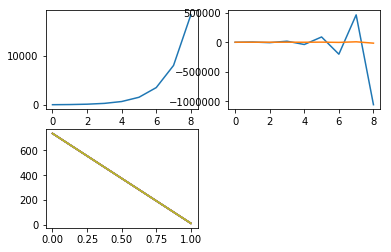

In [184]:
print((linear_regression.avg_minibatch_partial_grads))

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(linear_regression.loss)

plt.subplot(2, 2, 2)
plt.plot(np.array(linear_regression.avg_minibatch_partial_grads))

plt.subplot(2, 2, 3)
plt.plot(np.array(linear_regression.theta).transpose())

plt.show()


In [173]:
y_predicted = linear_regression.predict(x)

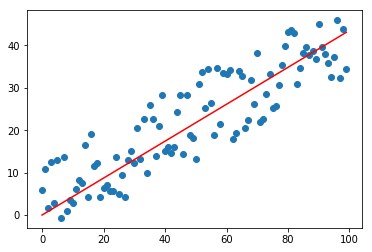

In [174]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()